# Customer Churn Prediction using Machine Learning

The goal of this project is to modelling customer churn prediction using machine learning approximation and choose what is the best model pr algorithm to model it.
<br>
<br>
There are several steps in this project:
- Import data and library needed
- Data Cleaning (handling missing values, outlier, duplicates, invalid format)
- Exploration Data Analysis
- Data Preparation (encoding, split train and test)
- Modelling using 3 algorithm : Logistic Regression, Random Forest Classifier, and Gradient Boost Classifier
- Choose the best model based on the model evaluation (classification_report, confusion_matrix)

# Import library

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle

# Import Data

In [25]:
df_load = pd.read_csv('dqlab_telco.csv')

df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7113 non-null   int64  
 1   customerID        7113 non-null   object 
 2   gender            7113 non-null   object 
 3   SeniorCitizen     7113 non-null   int64  
 4   Partner           7113 non-null   object 
 5   Dependents        7113 non-null   object 
 6   tenure            7014 non-null   float64
 7   PhoneService      7113 non-null   object 
 8   MultipleLines     7113 non-null   object 
 9   InternetService   7113 non-null   object 
 10  OnlineSecurity    7113 non-null   object 
 11  OnlineBackup      7113 non-null   object 
 12  DeviceProtection  7113 non-null   object 
 13  TechSupport       7113 non-null   object 
 14  StreamingTV       7113 non-null   object 
 15  StreamingMovies   7113 non-null   object 
 16  Contract          7113 non-null   object 


In [27]:
# Show total unique id
df_load['customerID'].nunique()

7017

# Data Cleaning

### Drop invalid customer ID number
The criteria is:
- Character length is 11-12.
- Only contain numbers
- It starts with the first two-digit number of 45.

In [28]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('Total filtered ID Number: ',df_load['customerID'].count())

Total filtered ID Number:  7006


### Drop duplicate customer ID Number

In [29]:
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(subset=['customerID'])
print('Total customer ID after drop duplicates :',df_load['customerID'].count())

Total customer ID after drop duplicates : 6993


## Handling missing values

Churn column

In [30]:
print('Total missing values data from Churn column: ', df_load['Churn'].isnull().sum())

# Dropping all Rows with missing values in spesific column (churn)
df_load.dropna(subset=['Churn'], inplace=True)
print('Total Rows and Data columns after deleting Missing Values data: ', df_load.shape)

Total missing values data from Churn column:  43
Total Rows and Data columns after deleting Missing Values data:  (6950, 22)


Other columns

In [31]:
print('Missing Values Status:',df_load.isnull().values.any())
print('\nTotal Missing Values for each column:')
print(df_load.isnull().sum().sort_values(ascending=False))

Missing Values Status: True

Total Missing Values for each column:
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64


In [32]:
# Handling missing values Tenure fill with 11, based on data modeller request
df_load['tenure'].fillna(11, inplace=True)

In [33]:
# Handling missing values num vars (except Tenure) with the median
for col_name in list(['MonthlyCharges','TotalCharges']):
	median = df_load[col_name].median()
	df_load[col_name].fillna(median, inplace=True)

In [34]:
print('\nTotal missing values after imputer:')
print(df_load.isnull().sum().sort_values(ascending=False))


Total missing values after imputer:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
Churn               0
dtype: int64


## Handling Outlier


Data distribution before handling outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


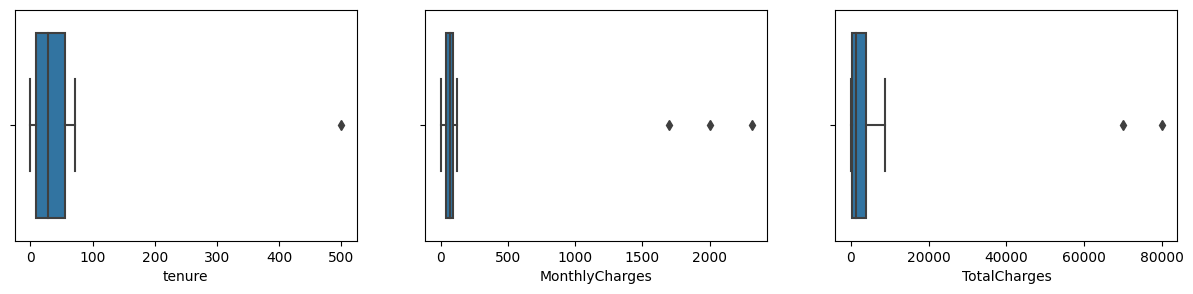

In [35]:
print('\nData distribution before handling outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

fig, ax = plt.subplots(ncols=3, figsize=(15,3))

ax1 = sns.boxplot(x=df_load['tenure'], ax=ax[0])
ax2 = sns.boxplot(x=df_load['MonthlyCharges'], ax = ax[1])
ax3 = sns.boxplot(x=df_load['TotalCharges'], ax = ax[2])
plt.show()

In [36]:
# Handling with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
print('Maximum value from all variables: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nMinimum value from all variables: ')
print(minimum)

Maximum value from all variables: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Minimum value from all variables: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


In [37]:
df_load[['tenure','MonthlyCharges','TotalCharges']] = df_load[['tenure','MonthlyCharges','TotalCharges']].mask(df_load[['tenure','MonthlyCharges','TotalCharges']]>maximum, maximum, axis=1) 
df_load[['tenure','MonthlyCharges','TotalCharges']] = df_load[['tenure','MonthlyCharges','TotalCharges']].mask(df_load[['tenure','MonthlyCharges','TotalCharges']]<minimum, minimum, axis=1)

In [38]:
print('\nData distribution after handling Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())


Data distribution after handling Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


## Handling unstandardized data

In [39]:
# Find unstadardized data
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
	print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name, 'column')
	print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender column
gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen column
SeniorCitizen
0    5822
1    1128
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable Partner column
Partner
No     3591
Yes    3359
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable Dependents column
Dependents
No     4870
Yes    2060
Iya      20
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService column
PhoneService
Yes    6281
No      669
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines column
MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable InternetService column
InternetService
Fiber optic    3057
D

In [40]:
# Replace unstandardized data
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
gender
Male      3505
Female    3445
Name: count, dtype: int64

Unique Values Count After Standardized Variable Dependents
Dependents
No     4870
Yes    2080
Name: count, dtype: int64

Unique Values Count After Standardized Variable Churn
Churn
No     5114
Yes    1836
Name: count, dtype: int64


## Remove unnecessary columns

In [41]:
df_load.drop(['customerID','UpdatedAt','Dependents','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
              'TechSupport','StreamingMovies','Contract','PaymentMethod'], axis=1, inplace=True)

## Show the final data after cleaning

In [42]:
df_load.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,StreamingTV,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,1.0,No,DSL,No,Yes,29.85,29.85,No
4727,Male,0,Yes,60.0,Yes,No,No internet service,Yes,20.50,1198.80,No
4738,Male,0,No,5.0,Yes,Fiber optic,Yes,No,104.10,541.90,Yes
4737,Female,0,Yes,72.0,Yes,Fiber optic,Yes,Yes,115.50,8312.75,No
4736,Female,0,Yes,56.0,Yes,DSL,Yes,No,81.25,4620.40,No


In [43]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6950 entries, 0 to 2369
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6950 non-null   object 
 1   SeniorCitizen     6950 non-null   int64  
 2   Partner           6950 non-null   object 
 3   tenure            6950 non-null   float64
 4   PhoneService      6950 non-null   object 
 5   InternetService   6950 non-null   object 
 6   StreamingTV       6950 non-null   object 
 7   PaperlessBilling  6950 non-null   object 
 8   MonthlyCharges    6950 non-null   float64
 9   TotalCharges      6950 non-null   float64
 10  Churn             6950 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 651.6+ KB


# Exploratory Data Analysis

### Visualize Churn Presentation

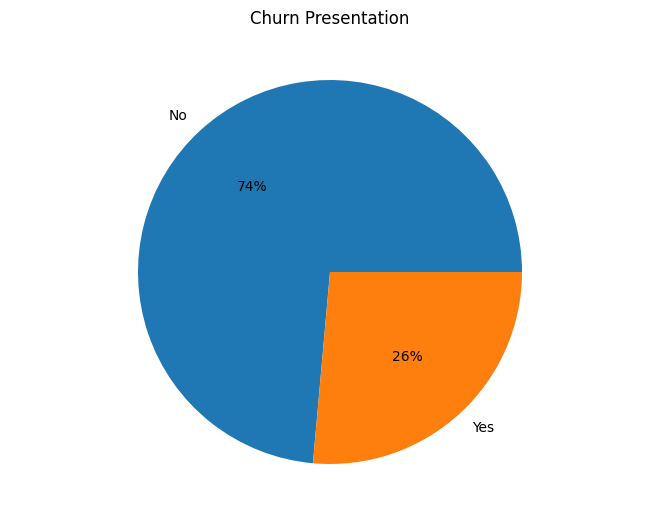

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Churn Presentation')
ax.axis('equal')
labels = ['No','Yes']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

### Numerical values

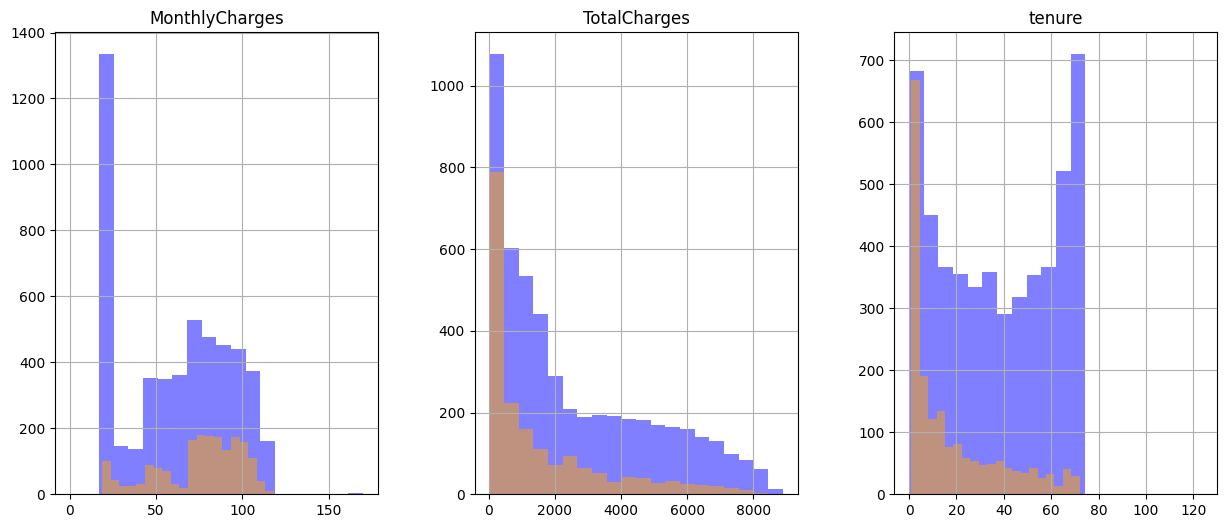

In [45]:
#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

### Categorical values

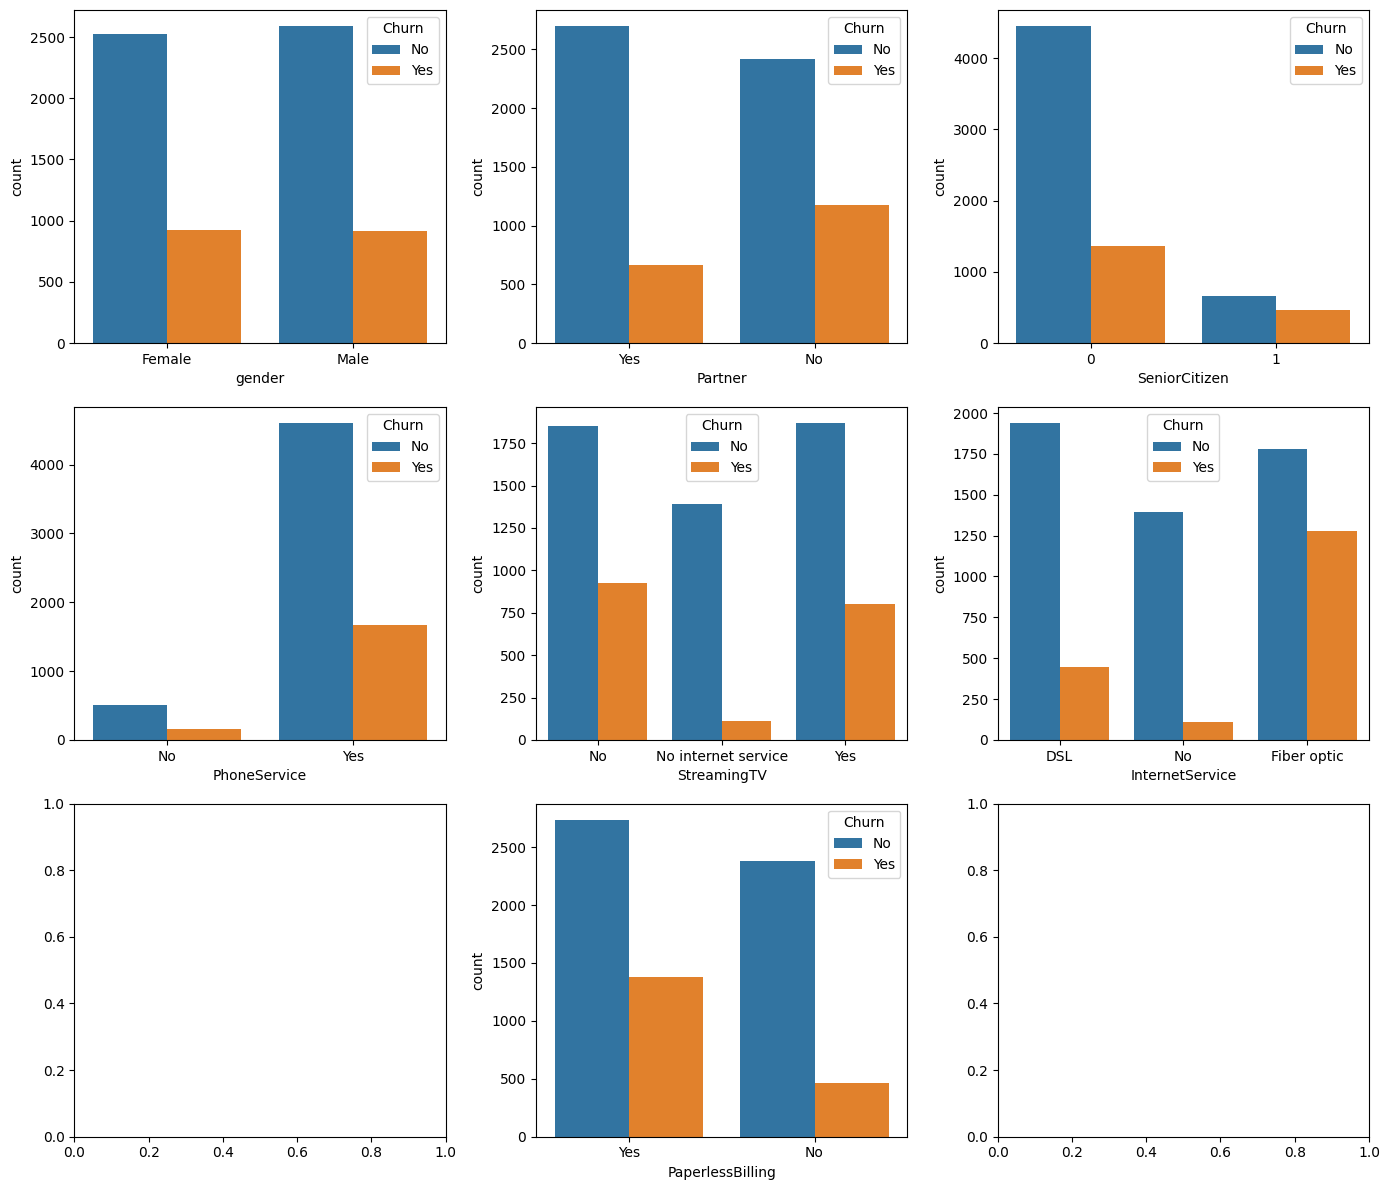

In [46]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

## Data Encoding

In [ ]:
#Convert all the non-numeric columns to numerical data types
for column in df_load.columns:
    if df_load[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    df_load[column] = LabelEncoder().fit_transform(df_load[column])

In [48]:
df_load.describe()

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,StreamingTV,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,32.423165,0.903741,0.872950,0.985180,0.591942,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,24.581073,0.294967,0.737618,0.885069,0.491509,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,124.000000,1.000000,2.000000,2.000000,1.000000,169.931250,8889.131250,1.000000


## Splitting dataset

In [49]:
# Predictor and target
X = df_load.drop('Churn', axis = 1) 
y = df_load['Churn']

# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print according to the expected result
print('x_train shape:', x_train.shape,', y_train shape:', y_train.shape)
print('Churn presentation of training data:')
print(y_train.value_counts(normalize=True))
print('x_test shape:', x_test.shape,', y_test shape:', y_test.shape)
print('Churn presentation of test data:')
print(y_test.value_counts(normalize=True))

x_train shape: (4865, 10) , y_train shape: (4865,)
Churn presentation of training data:
Churn
0    0.734841
1    0.265159
Name: proportion, dtype: float64
x_test shape: (2085, 10) , y_test shape: (2085,)
Churn presentation of test data:
Churn
0    0.738129
1    0.261871
Name: proportion, dtype: float64


# Data Modelling

## Logistic Regression

In [ ]:
# Train the LogisticRegression Model
log_model = LogisticRegression().fit(x_train, y_train)

### Data Training Model Performance

In [54]:
# Predict
y_train_pred = log_model.predict(x_train)

# Print classification report 
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3575
           1       0.65      0.49      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.80      0.78      4865



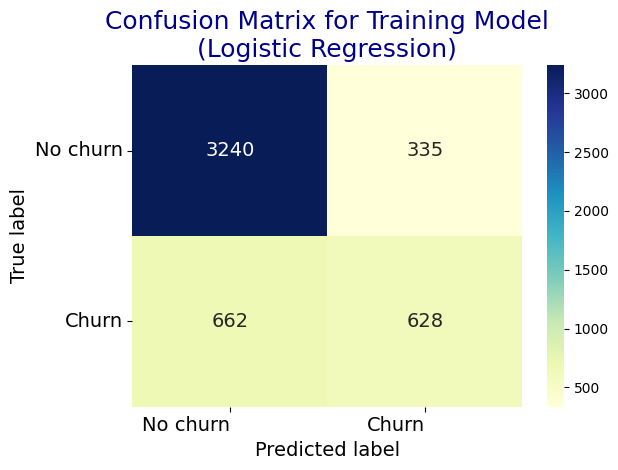

In [56]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### Data Testing Model Performance

In [57]:
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



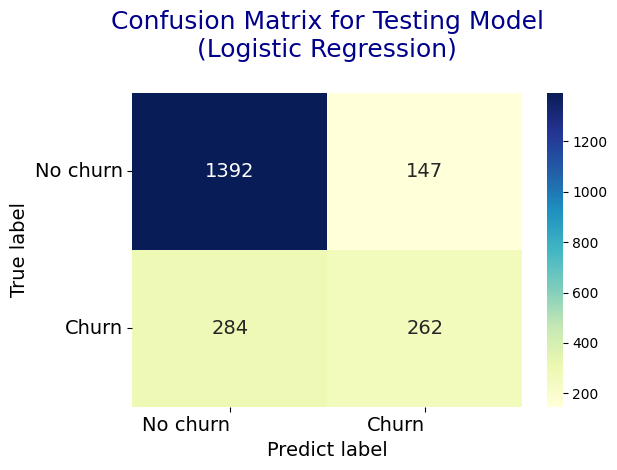

In [58]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predict label', fontsize=14)
plt.tight_layout()
plt.show()

## Random Forest Classifier

In [59]:
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)

### Data Training Model Performance

In [60]:
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       0.99      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



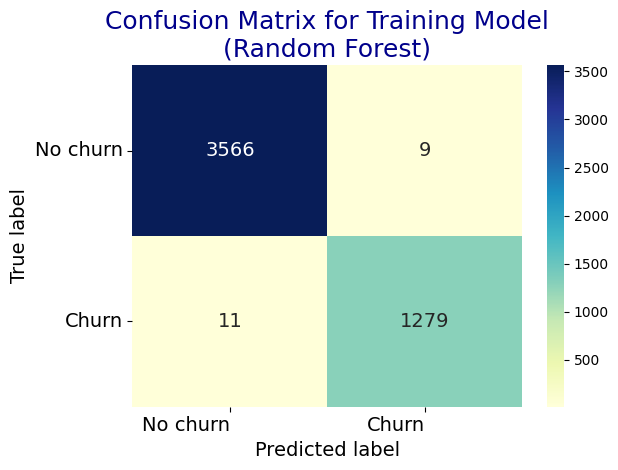

In [61]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### Data Testing Model Performance

In [62]:
# Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1539
           1       0.60      0.47      0.53       546

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.77      0.78      0.77      2085



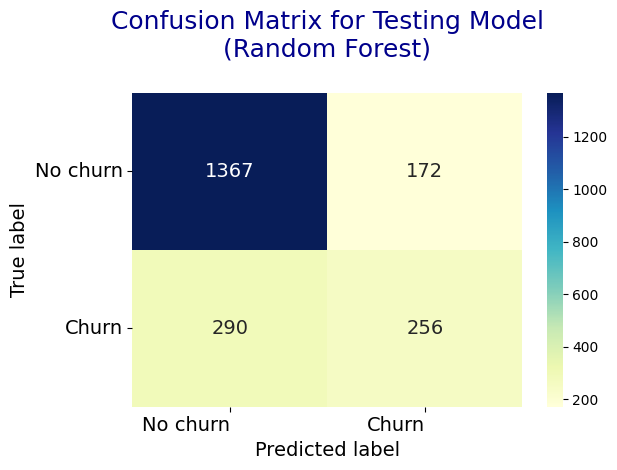

In [63]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.tight_layout()
plt.show()

## Gradient Boosting Classifier

In [64]:
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)

### Data Training Model Performance

In [65]:
# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3575
           1       0.70      0.54      0.61      1290

    accuracy                           0.82      4865
   macro avg       0.78      0.73      0.75      4865
weighted avg       0.81      0.82      0.81      4865



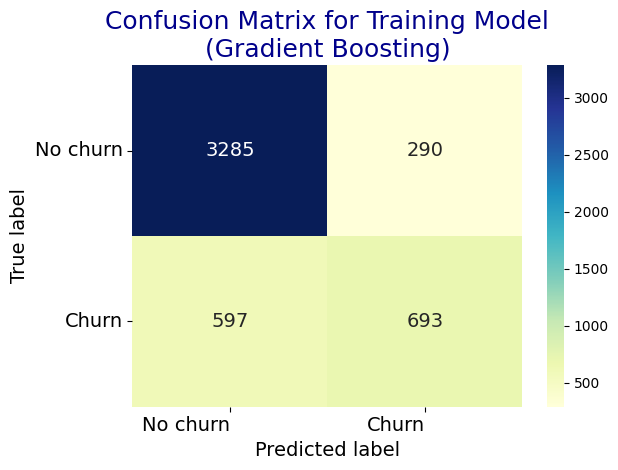

In [66]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### Data Testing Model Performance

In [67]:
# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.66      0.49      0.56       546

    accuracy                           0.80      2085
   macro avg       0.75      0.70      0.72      2085
weighted avg       0.79      0.80      0.79      2085



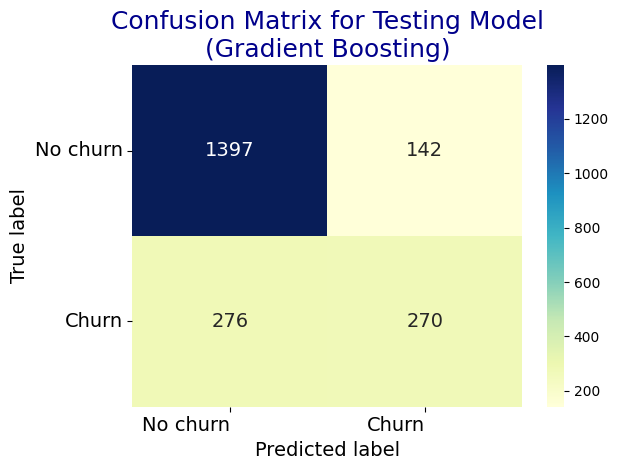

In [68]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

# Rubrik Conclusion

Based on the modelling that has been done using 3 model: Logistic Regression, Random Forest and Extreme Gradiant Boost, <br>
It can be concluded that the best model to predict the churn of customers using this dataset is the ***Logistic regression algorithm***. <br>This is because the performance of the Logistic Regression model tends to be able to predict both the training phase and the testing phase (training accuracy 80%, testing accurately 79%), while the other side of the algorithm is likely to over-fit its performance.